## Stock Market API Project

In [2]:
%pip install python-dotenv plotly nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from dotenv import load_dotenv
load_dotenv()

True

In [6]:
import os 
api_key = os.getenv("API_KEY")


In [28]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"datatype":"json","keywords":"State Bank of India","function":"SYMBOL_SEARCH"}

headers = {
	"x-rapidapi-key": api_key,
	"x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

data = response.json()

In [11]:
data

{'bestMatches': [{'1. symbol': 'SBIN.BSE',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'India/Bombay',
   '5. marketOpen': '09:15',
   '6. marketClose': '15:30',
   '7. timezone': 'UTC+5.5',
   '8. currency': 'INR',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SBKFF',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'United States',
   '5. marketOpen': '09:30',
   '6. marketClose': '16:00',
   '7. timezone': 'UTC-04',
   '8. currency': 'USD',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SID.FRK',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'Frankfurt',
   '5. marketOpen': '08:00',
   '6. marketClose': '20:00',
   '7. timezone': 'UTC+02',
   '8. currency': 'EUR',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SBID.LON',
   '2. name': 'State Bank of India GDR',
   '3. type': 'Equity',
   '4. region': 'United Kingdom',
   '5. marketOpen': '08:00',
   '6. marketClose': '16:30',
   '7. timez

In [12]:
data.keys()

dict_keys(['bestMatches'])

In [13]:
matches = data["bestMatches"]

In [14]:
import pandas as pd
symbols = pd.DataFrame(matches)
symbols

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,SBIN.BSE,State Bank of India,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,1.0000
1,SBKFF,State Bank of India,Equity,United States,09:30,16:00,UTC-04,USD,1.0000
2,SID.FRK,State Bank of India,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,1.0000
3,SBID.LON,State Bank of India GDR,Equity,United Kingdom,08:00,16:30,UTC+01,USD,0.9048


### State bank of India symbol in India is SBIN.BSE

In [29]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"function":"TIME_SERIES_DAILY","symbol":"MSFT","outputsize":"compact","datatype":"json"}

headers = {
	"x-rapidapi-key": api_key,
	"x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

data2 = response.json()

In [16]:
data2

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'MSFT',
  '3. Last Refreshed': '2024-11-14',
  '4. Output Size': 'Compact',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2024-11-14': {'1. open': '425.0000',
   '2. high': '428.1700',
   '3. low': '420.0000',
   '4. close': '426.8900',
   '5. volume': '30246881'},
  '2024-11-13': {'1. open': '421.6400',
   '2. high': '429.3250',
   '3. low': '418.2100',
   '4. close': '425.2000',
   '5. volume': '21502185'},
  '2024-11-12': {'1. open': '418.2500',
   '2. high': '424.4400',
   '3. low': '417.2000',
   '4. close': '423.0300',
   '5. volume': '19401204'},
  '2024-11-11': {'1. open': '422.5150',
   '2. high': '424.8100',
   '3. low': '416.0000',
   '4. close': '418.0100',
   '5. volume': '24503321'},
  '2024-11-08': {'1. open': '425.3200',
   '2. high': '426.5000',
   '3. low': '421.7800',
   '4. close': '422.5400',
   '5. volume': '16891414'},
  '2024-11-07': {'1. open': '421

In [17]:
data2.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [18]:
df2 = pd.DataFrame(data2["Time Series (Daily)"]).T
df2

,1. open,2. high,3. low,4. close,5. volume
2024-11-14,425.0000,428.1700,420.0000,426.8900,30246881
2024-11-13,421.6400,429.3250,418.2100,425.2000,21502185
2024-11-12,418.2500,424.4400,417.2000,423.0300,19401204
2024-11-11,422.5150,424.8100,416.0000,418.0100,24503321
2024-11-08,425.3200,426.5000,421.7800,422.5400,16891414
...,...,...,...,...,...
2024-07-02,453.2000,459.5900,453.1130,459.2800,13979779
2024-07-01,448.6600,457.3700,445.6600,456.7300,17662818
2024-06-28,453.0700,455.3800,446.4100,446.9500,28362271
2024-06-27,452.1750,456.1700,451.7700,452.8500,14806324


In [19]:
df2.dtypes

1. open      object
2. high      object
3. low       object
4. close     object
5. volume    object
dtype: object

In [20]:
df2 = df2.astype("float")

In [21]:
df2

,1. open,2. high,3. low,4. close,5. volume
2024-11-14,425.000,428.170,420.000,426.89,30246881.0
2024-11-13,421.640,429.325,418.210,425.20,21502185.0
2024-11-12,418.250,424.440,417.200,423.03,19401204.0
2024-11-11,422.515,424.810,416.000,418.01,24503321.0
2024-11-08,425.320,426.500,421.780,422.54,16891414.0
...,...,...,...,...,...
2024-07-02,453.200,459.590,453.113,459.28,13979779.0
2024-07-01,448.660,457.370,445.660,456.73,17662818.0
2024-06-28,453.070,455.380,446.410,446.95,28362271.0
2024-06-27,452.175,456.170,451.770,452.85,14806324.0


In [22]:
df2.dtypes

1. open      float64
2. high      float64
3. low       float64
4. close     float64
5. volume    float64
dtype: object

In [23]:
df2.index = pd.to_datetime(df2.index)

#### Plot the graph

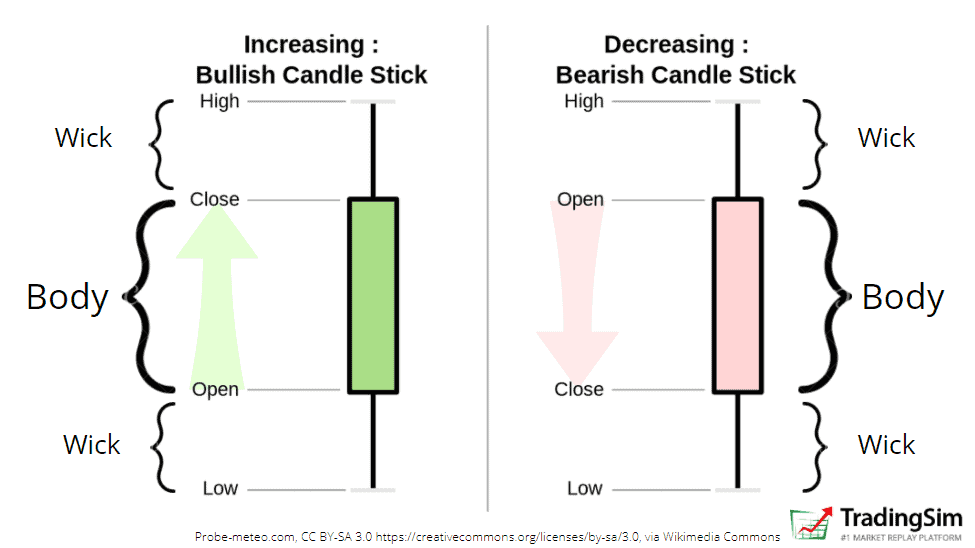

In [24]:
df2.to_csv("SBIN.csv")

### Visualize  SBI stock price

In [25]:
import plotly.graph_objects as go

In [ ]:
chart = go.Figure(
    data = [
        go.Candlestick(
            x = df2.index,
            open = df2["1. open"],
            high = df2["2. high"],
            low = df2["3. low"],
            close = df2["4. close"]
        )

    ]
)

chart.update_layout(width = 1200, height = 800)

chart.show()

### Creating class for Getting any data stock data

In [30]:
class StockFetch:

    def __init__(self,api_key) -> None:
        self.api_key = api_key
        self.url = "https://alpha-vantage.p.rapidapi.com/query"
        self.headers = {
	         "x-rapidapi-key": self.api_key,
	         "x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
        }
        
    def get_stock_symbol(self,company):
        querystring = {"datatype":"json",
                       "keywords":company,
                       "function":"SYMBOL_SEARCH"}
        response = requests.get(self.url,headers=self.headers,params=querystring)
        response.raise_for_status()
        data = response.json()["bestMatches"]
        symbols = pd.DataFrame(data)
        return symbols
    
    def stock_prices(self,symbol):
        querystring = {
            "function":"TIME_SERIES_DAILY",
            "symbol":"MSFT",
            "outputsize":"compact",
            "datatype":"json"
            }
        response = requests.get(self.url, headers= headers, params=querystring)
        response.raise_for_status()
        data = response.json()["Time Series (Daily)"]
        prices = pd.DataFrame(data).T
        prices = prices.astype(float)
        prices.index = pd.to_datetime(prices.index)
        return prices
    
    def candlestick_chart(self,prices):
        chart = go.Figure(
    data = [
        go.Candlestick(
            x = df2.index,
            open = df2["1. open"],
            high = df2["2. high"],
            low = df2["3. low"],
            close = df2["4. close"]
        )

    ]
)

chart.update_layout(width = 1200, height = 800)

chart.show()
        
        

        




In [31]:
client = StockFetch(api_key= os.getenv("API_KEY"))
client

In [32]:
type(client)

__main__.StockFetch

In [33]:
client.get_stock_symbol("HDFC Bank")

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,HDB,HDFC Bank Ltd,Equity,United States,09:30,16:00,UTC-04,USD,0.8182
1,HDFCBANK.BSE,HDFC Bank Limited,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.8000
2,H1DB34.SAO,HDFC Bank Limited,Equity,Brazil/Sao Paolo,10:00,17:30,UTC-03,BRL,0.6923
3,HDFA.FRK,HDFC Bank Limited,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,0.6923


In [34]:
prices = client.stock_prices(symbol= "HDFCBANK.BSE")
prices

,1. open,2. high,3. low,4. close,5. volume
2024-11-14,425.000,428.170,420.000,426.89,30246881.0
2024-11-13,421.640,429.325,418.210,425.20,21502185.0
2024-11-12,418.250,424.440,417.200,423.03,19401204.0
2024-11-11,422.515,424.810,416.000,418.01,24503321.0
2024-11-08,425.320,426.500,421.780,422.54,16891414.0
...,...,...,...,...,...
2024-07-02,453.200,459.590,453.113,459.28,13979779.0
2024-07-01,448.660,457.370,445.660,456.73,17662818.0
2024-06-28,453.070,455.380,446.410,446.95,28362271.0
2024-06-27,452.175,456.170,451.770,452.85,14806324.0


In [35]:
prices.to_csv("HDFCBank.csv")

In [36]:
client.get_stock_symbol(company= "Adani")

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,ADANIENT.BSE,Adani Enterprises Limited,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.6250
1,ADANIENSOL.BSE,Adani Energy Solutions Limited,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.5556
2,ADANIGREEN.BSE,Adani Green Energy Ltd,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.5556
3,ADANIPORTS.BSE,ADANI PORTS AND SPECIAL ECONOMIC ZONE LTD.,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.5556
4,ADANIPOWER.BSE,Adani Power Limited,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.5556
5,AWL.BSE,Adani Wilmar Ltd,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.4762
6,ATGL.BSE,Adani Total Gas Ltd,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.4167
7,541450.BSE,Adani Green Energy Limited,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.3226
8,532921.BSE,Adani Ports and Special Economic Zone Limited,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.2000


In [37]:
prices2 = client.stock_prices(symbol= "ADANIPOWER.BSE")
prices2

,1. open,2. high,3. low,4. close,5. volume
2024-11-14,425.000,428.170,420.000,426.89,30246881.0
2024-11-13,421.640,429.325,418.210,425.20,21502185.0
2024-11-12,418.250,424.440,417.200,423.03,19401204.0
2024-11-11,422.515,424.810,416.000,418.01,24503321.0
2024-11-08,425.320,426.500,421.780,422.54,16891414.0
...,...,...,...,...,...
2024-07-02,453.200,459.590,453.113,459.28,13979779.0
2024-07-01,448.660,457.370,445.660,456.73,17662818.0
2024-06-28,453.070,455.380,446.410,446.95,28362271.0
2024-06-27,452.175,456.170,451.770,452.85,14806324.0


In [38]:
prices2.to_csv("AdaniPower.csv")

In [39]:
client.candlestick_chart(prices= prices2)